## Problem Statement

This Project is for classification of images of Dogs and Cats.

#### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from keras_preprocessing.image import load_img
from keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

import os

In [6]:
import zipfile

train_zip = zipfile.ZipFile("C:/Users/DELL/OneDrive/Documents/StarAgile/Assessment/AI & Deep learning/Assignment 3_Image classification/train.zip")
train_zip.extractall("C:/Users/DELL/OneDrive/Documents/StarAgile/Assessment/AI & Deep learning/Assignment 3_Image classification")
train_zip.close()

In [7]:
import zipfile

train_zip = zipfile.ZipFile("C:/Users/DELL/OneDrive/Documents/StarAgile/Assessment/AI & Deep learning/Assignment 3_Image classification/test1.zip")
train_zip.extractall("C:/Users/DELL/OneDrive/Documents/StarAgile/Assessment/AI & Deep learning/Assignment 3_Image classification")
train_zip.close()

In [8]:
Image_width = 128
Image_height = 128
Image_size = (Image_width , Image_height)
Image_channel = 3

Image_rgb_size = (Image_width ,Image_height , 3 )

In [9]:
filenames = os.listdir('train')
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'dog':
        categories.append(1)
    else:
        categories.append(0)
data = pd.DataFrame({'filename' : filenames , 'category' : categories})
data.head()

,filename,category
0,cat.0.jpg,0
1,cat.1.jpg,0
2,cat.10.jpg,0
3,cat.100.jpg,0
4,cat.1000.jpg,0


In [10]:
data['category'].value_counts()

0    12500
1    12500
Name: category, dtype: int64

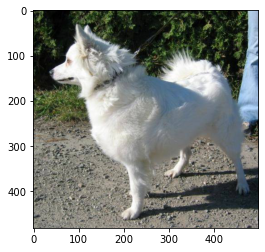

In [11]:
import random
sample = random.choice(filenames)
image = load_img('./train/{}'.format(sample))
plt.imshow(image)

In [12]:
data['category1'] = data['category'].apply(lambda x: 'cat' if x== 0 else 'dog')
data.head()

,filename,category,category1
0,cat.0.jpg,0,cat
1,cat.1.jpg,0,cat
2,cat.10.jpg,0,cat
3,cat.100.jpg,0,cat
4,cat.1000.jpg,0,cat


In [13]:
data.drop(['category'] , inplace = True , axis = 1)
data.rename(columns  = {'category1' : 'category'} , inplace =True)
data.head()

,filename,category
0,cat.0.jpg,cat
1,cat.1.jpg,cat
2,cat.10.jpg,cat
3,cat.100.jpg,cat
4,cat.1000.jpg,cat


In [14]:
train_df , val_df = train_test_split(data , test_size = 0.2 , random_state = 42)
train_df = train_df.reset_index(drop = True)
val_df = val_df.reset_index(drop = True)

In [15]:
train_df.shape , val_df.shape

((20000, 2), (5000, 2))

In [16]:
batch_size  = 15
epochs = 7 #due to speed
total_train = train_df.shape[0]
total_validate = val_df.shape[0]

In [17]:
train_dategen = ImageDataGenerator(rotation_range = 15 , 
                                  rescale = 1.0/255 ,
                                  shear_range = 0.1,
                                  zoom_range = 0.2 , 
                                  horizontal_flip = True , 
                                  width_shift_range = 0.1 , 
                                  height_shift_range = 0.1
                                  )

In [18]:
train_generator = train_dategen.flow_from_dataframe(
    train_df, 
    "./train", 
    x_col='filename',
    y_col='category',
    target_size=Image_size,
    class_mode='categorical',
    batch_size=batch_size
)  

Found 20000 validated image filenames belonging to 2 classes.


In [19]:
validation_datagen = ImageDataGenerator(rescale = 1./255)
val_generator = validation_datagen.flow_from_dataframe(
    val_df, 
    "./train", 
    x_col='filename',
    y_col='category',
    target_size=Image_size,
    class_mode='categorical',
    batch_size=batch_size
)  

Found 5000 validated image filenames belonging to 2 classes.


In [20]:
from keras.layers import GlobalAveragePooling2D
from keras.models import Model

In [21]:
import tensorflow

In [22]:
from  tensorflow.keras.models import Sequential
from  tensorflow.keras.layers import Conv2D , MaxPooling2D , Dropout , Flatten , Dense , Activation , BatchNormalization

base = tensorflow.keras.applications.resnet50.ResNet50(weights = 'imagenet' , include_top = False , input_shape = Image_rgb_size)

In [23]:
x = base.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.7)(x)
predictions = Dense(2, activation= 'softmax')(x)
model = Model(inputs = base.input, outputs = predictions)

In [24]:
from tensorflow.keras.optimizers import Adam 
# sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
adam = Adam(learning_rate=0.0001)
model.compile(optimizer= adam, loss='categorical_crossentropy', metrics=['accuracy'])

In [25]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 134, 134, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 64, 64, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 64, 64, 64)   256         ['conv1_conv[0][0]']         

 conv2_block3_2_conv (Conv2D)   (None, 32, 32, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 32, 32, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 32, 32, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_3_conv (Conv2D)   (None, 32, 32, 256)  16640       ['conv2_block3_2_relu[0][0]']    
                                                                                                  
 conv2_blo

 conv3_block3_2_conv (Conv2D)   (None, 16, 16, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 16, 16, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 16, 16, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_3_conv (Conv2D)   (None, 16, 16, 512)  66048       ['conv3_block3_2_relu[0][0]']    
                                                                                                  
 conv3_blo

 conv4_block2_2_conv (Conv2D)   (None, 8, 8, 256)    590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 8, 8, 256)   1024        ['conv4_block2_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_2_relu (Activatio  (None, 8, 8, 256)   0           ['conv4_block2_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_3_conv (Conv2D)   (None, 8, 8, 1024)   263168      ['conv4_block2_2_relu[0][0]']    
                                                                                                  
 conv4_blo

 conv4_block5_2_relu (Activatio  (None, 8, 8, 256)   0           ['conv4_block5_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_3_conv (Conv2D)   (None, 8, 8, 1024)   263168      ['conv4_block5_2_relu[0][0]']    
                                                                                                  
 conv4_block5_3_bn (BatchNormal  (None, 8, 8, 1024)  4096        ['conv4_block5_3_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_add (Add)         (None, 8, 8, 1024)   0           ['conv4_block4_out[0][0]',       
                                                                  'conv4_block5_3_bn[0][0]']      
          

 conv5_block2_2_relu (Activatio  (None, 4, 4, 512)   0           ['conv5_block2_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv5_block2_3_conv (Conv2D)   (None, 4, 4, 2048)   1050624     ['conv5_block2_2_relu[0][0]']    
                                                                                                  
 conv5_block2_3_bn (BatchNormal  (None, 4, 4, 2048)  8192        ['conv5_block2_3_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_add (Add)         (None, 4, 4, 2048)   0           ['conv5_block1_out[0][0]',       
                                                                  'conv5_block2_3_bn[0][0]']      
          

In [26]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
earlystop = EarlyStopping(patience = 10)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)
callbacks = [earlystop , learning_rate_reduction]

In [27]:
history = model.fit_generator(
    train_generator , 
    epochs = epochs , 
    validation_data=val_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks
)

<ipython-input-27-eb07c6e3c7c4>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/7
1333/1333 [==============================] - 4959s 4s/step - loss: 0.2216 - accuracy: 0.9145 - val_loss: 0.1306 - val_accuracy: 0.9558 - lr: 1.0000e-04
Epoch 2/7
1333/1333 [==============================] - 42788s 32s/step - loss: 0.1185 - accuracy: 0.9539 - val_loss: 0.1055 - val_accuracy: 0.9622 - lr: 1.0000e-04
Epoch 3/7
1333/1333 [==============================] - 3303s 2s/step - loss: 0.1148 - accuracy: 0.9584 - val_loss: 0.1453 - val_accuracy: 0.9514 - lr: 1.0000e-04
Epoch 4/7
1333/1333 [==============================] - 3173s 2s/step - loss: 0.0860 - accuracy: 0.9659 - val_loss: 0.0896 - val_accuracy: 0.9690 - lr: 1.0000e-04
Epoch 5/7
1333/1333 [==============================] - 4136s 3s/step - loss: 0.0767 - accuracy: 0.9701 - val_loss: 0.0822 - val_accuracy: 0.9692 - lr: 1.0000e-04
Epoch 6/7
1333/1333 [==============================] - 3347s 3s/step - loss: 0.0752 - accuracy: 0.9720 - val_loss: 0.0838 - val_accuracy: 0.9686 - lr: 1.0000e-04
Epoch 7/7
1333/1333 [=====

In [28]:
test_filenames = os.listdir('./test1')
test = pd.DataFrame({'filename' : test_filenames})
nb_samples = test.shape[0]

In [29]:
test.head()

,filename
0,1.jpg
1,10.jpg
2,100.jpg
3,1000.jpg
4,10000.jpg


In [30]:
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test , 
    './test1' ,
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=Image_size,
    batch_size=batch_size,
    shuffle=False
    )

Found 12500 validated image filenames.


In [31]:
predict = model.predict_generator(test_generator , steps = np.ceil(nb_samples/batch_size))
test['category'] = np.argmax(predict  , axis= -1)
test.head()

<ipython-input-31-12e17a52101d>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predict = model.predict_generator(test_generator , steps = np.ceil(nb_samples/batch_size))


,filename,category
0,1.jpg,1
1,10.jpg,0
2,100.jpg,0
3,1000.jpg,1
4,10000.jpg,1
